In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color, img_as_float, filters
from scipy.fft import fft2, fftshift, ifft2, ifftshift

## Import Image w/ Periodic Noise

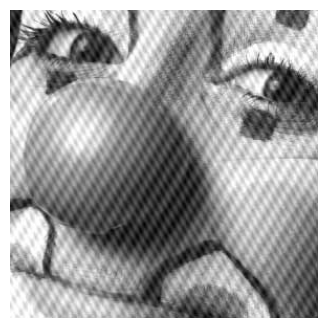

In [4]:
# Import Image corrupted by periodic noise
clown_image = io.imread("/content/ClownOrig.jpeg", as_gray=True)

# Plot the image
plt.figure(figsize=(8,4))
plt.imshow(clown_image, cmap="gray")
plt.axis("off")
plt.show()

## Convert to Frequency Domain

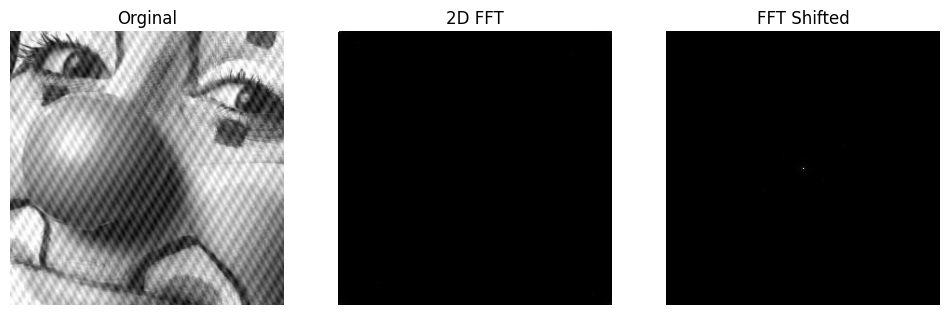

In [6]:
# Convert to FD
clown_fft_result = fft2(clown_image)

# Shift to center
clown_fd_center_shift = fftshift(clown_fft_result)

# Plot
plt.figure(figsize = (12, 6))

plt.subplot(1,3,1)
plt.imshow(clown_image, cmap="gray")
plt.title("Orginal")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(np.abs(clown_fft_result), cmap = "gray")
plt.title("2D FFT")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(np.abs(clown_fd_center_shift), cmap="gray")
plt.title("FFT Shifted")
plt.axis("off")

plt.show()

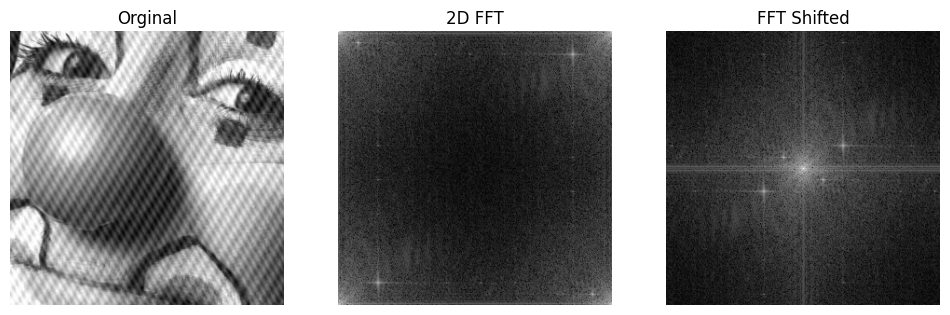

In [8]:
# Using np.log(1 + np.abs())
# Convert to FD
clown_fft_result = fft2(clown_image)

# Shift to center
clown_fd_center_shift = fftshift(clown_fft_result)

# Plot
plt.figure(figsize = (12, 6))

plt.subplot(1,3,1)
plt.imshow(clown_image, cmap="gray")
plt.title("Orginal")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(np.log(1+np.abs(clown_fft_result)), cmap = "gray")
plt.title("2D FFT")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(np.log(1+np.abs(clown_fd_center_shift)), cmap="gray")
plt.title("FFT Shifted")
plt.axis("off")

plt.show()


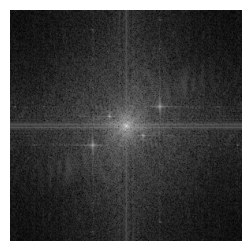

In [9]:
# Transform to Fourier Domain
IM = fft2(clown_image)
IMs = fftshift(IM)

plt.figure(figsize=(6,3))
plt.imshow(np.log(1+np.abs(IMs)), cmap="gray") # np.log(1 + np.abs(img)) <-- log transform used to highlight the components
# plt.imshow(np.abs(IMs), cmap="gray")  # Without np.log - the output is dark and the components cannot be seen
plt.axis("off")
plt.show()

## Notch Filter

(np.float64(-0.5), np.float64(293.5), np.float64(293.5), np.float64(-0.5))

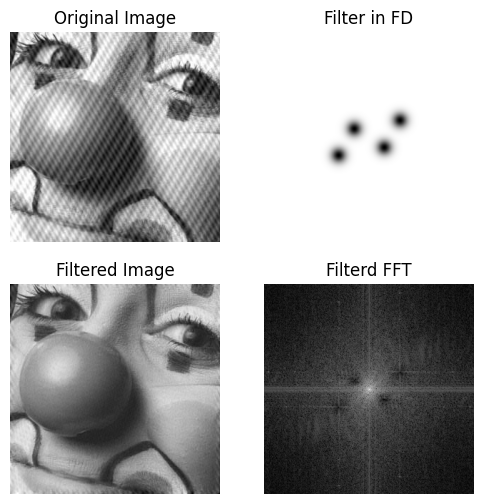

In [10]:
# Notch filter generation
N = IMs.shape[0]
x, y = np.meshgrid(np.arange(N), np.arange(N))

a1 = 0.008  # Size of circle in filter in fd graph
a2 = 0.008

# Gaussian
NF1 = 1 - np.exp(-a1 * (x-190)**2 - a2 * (y-123)**2)  # These numbers are the coordinates of the noise components. This affects the filter in fd graph which results in noise still present in the filtered image. Try hanging the numbers to see.
NF2 = 1 - np.exp(-a1 * (x-104)**2 - a2 * (y-172)**2)
NF3 = 1 - np.exp(-a1 * (x-126)**2 - a2 * (y-135)**2)
NF4 = 1 - np.exp(-a1 * (x-168)**2 - a2 * (y-161)**2)

Z = NF1*NF2*NF3*NF4  # Filter
IMFs = IMs*Z

IMFr = ifftshift(IMFs)
imfr = ifft2(IMFr)

plt.figure(figsize=(6,6))

plt.subplot(2,2,1)
plt.title("Original Image")
plt.imshow(clown_image, cmap="gray")
plt.axis("off")

plt.subplot(2,2,2)
plt.title("Filter in FD")
plt.imshow(np.log(1 + np.absolute(Z)), cmap="gray")
plt.axis("off")

plt.subplot(2,2,3)
plt.title("Filtered Image")
plt.imshow(np.real(imfr), cmap="gray")
plt.axis("off")

plt.subplot(2,2,4)
plt.title("Filterd FFT")
plt.imshow(np.log(1 + np.absolute(IMFs)), cmap="gray")
plt.axis("off")

(np.float64(-0.5), np.float64(293.5), np.float64(293.5), np.float64(-0.5))

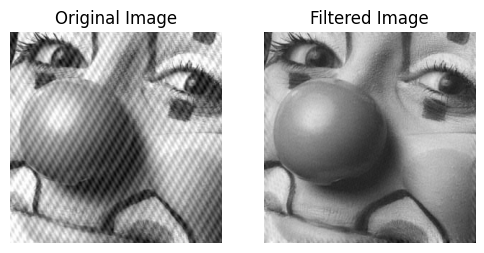

In [11]:
# Compare Original and Filtered Images
plt.figure(figsize=(6,6))

plt.subplot(1,2,1)
plt.imshow(clown_image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(np.real(imfr), cmap="gray")
plt.title("Filtered Image")
plt.axis("off")